<a href="https://colab.research.google.com/github/Dexduo/Introducao-a-Ciencia-de-Dados/blob/main/Trabalho_Pratico_1/Trabalho_Pratico_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error # erro quadratico médio para ser utilizado no calculo da precisão de regressão

## **Classificação com Iris Dataset**

In [3]:
iris = datasets.load_iris()
for key in iris.keys():
  print(key)

data
target
frame
target_names
DESCR
feature_names
filename
data_module


In [7]:
iris.target #podemos usar one hot encoding para mudar os valores das classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
X = iris.data
y = iris.target

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [10]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

**Usando KNN**

In [11]:
neighbors_knn = KNeighborsClassifier(n_neighbors=3)
neighbors_knn.fit(X_train, y_train)
neighbors_pred_knn = neighbors_knn.predict(X_test)
print(accuracy_score(neighbors_pred_knn, y_test))

0.98


**Usando SVC**

In [ ]:
neighbors_svc = SVC()
neighbors_svc.fit(X_train, y_train)
neighbors_pred_svc = neighbors_svc.predict(X_test)
print(accuracy_score(neighbors_pred_svc, y_test))

1.0


In [18]:
neighbors_svc = SVC()
neighbors_knn = KNeighborsClassifier(n_neighbors=3)
scores_knn = cross_val_score(neighbors_knn, X, y, cv=5)
scores_svc = cross_val_score(neighbors_svc, X, y, cv=5)
print("Acurácia média usando cross validation com KNN: {}".format(scores_knn.mean())) #média da acurácia das iterações do cross validation
print("Acurácia média usando cross validation com SVC: {}".format(scores_svc.mean())) #média da acurácia das iterações do cross validation

Acurácia média usando cross validation com KNN: 0.9666666666666668
Acurácia média usando cross validation com SVC: 0.9666666666666666


In [ ]:
#Vamos ver agora com cross validation porém usando o StratifiedKFold para não ter o risco de separar treino e teste de forma desbalanceada ex.: de uma só classe

## **Regressão com Wine Quality Dataset**

In [19]:
pip install ucimlrepo

In [20]:
from ucimlrepo import fetch_ucirepo

In [21]:
# fetch dataset
wine_quality = fetch_ucirepo(id=186)

In [22]:
#wine_data = wine_quality.data
#wine_data

In [23]:
# data (as pandas dataframes)
X_wine = wine_quality.data.features
y_wine = wine_quality.data.targets

In [27]:
X_wine

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


In [31]:
y_wine

,quality
0,5
1,5
2,5
3,6
4,5
...,...
6492,6
6493,5
6494,6
6495,7


In [ ]:
# metadata
#print(wine_quality.metadata)

In [ ]:
# variable information
#print(wine_quality.variables)

In [35]:
X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(X_wine, y_wine, test_size=0.33, random_state=42)

**Treino com Regressão Linear**

In [36]:
wine_linear_regression = LinearRegression().fit(X_train_wine, y_train_wine)

In [57]:
pred_wine_linear_regression = wine_linear_regression.predict(X_test_wine)
#passei o resultado para int pois as classes são inteiros (realmente precisa? pois usamos erro quadratico médio (distâncias))
#poderiamos utilizar round e depois inteiro
#porque round e depois inteiro ficou menos preciso?
#podemos mesmo utilizar mesmo esses arredondamentos? pois estamos modificando os valores da predição
#poderiamos talvez tratar os dados do dataset para obtermos mais precisao, como por exemplo redução de dimensionalidade etc...

In [59]:
print(mean_squared_error(y_test_wine, pred_wine_linear_regression, squared=True)) # podemos setar se queremos quadratico ou não

0.537513658511564


In [60]:
#pred_wine_linear_regression[:10]

In [61]:
#y_test_wine[:10]

Imagino que o modelo de Regressão Linear não soube lidar bem com múltiplas classes, poderíamos talvez utilizar técnica de one hot encoding para modificar os valores das classes.

**Treino com Random Forest Regression**

In [63]:
wine_rf_regression = RandomForestRegressor(max_depth=2, random_state=0).fit(X_train_wine, np.array(y_train_wine['quality']))
#usei np array no y_train pegando a coluna quality pois o modelo requer apenas 1 dimensão

In [66]:
pred_wine_rf_regression = wine_rf_regression.predict(X_test_wine)#.astype(int)
#com o truncamento a precisão subiu de 56% para 87%, estudar esse caso como no modelo anterior

In [67]:
print(mean_squared_error(y_test_wine, pred_wine_rf_regression, squared=True))

0.5668221492735535


## **Classificação com Digits Dataset**

In [69]:
digits = datasets.load_digits()
for key in digits.keys():
  print(key)

data
target
frame
feature_names
target_names
images
DESCR


In [70]:
X_digits = digits.data

In [71]:
y_digits = digits.target

In [92]:
X_digits #poderiamos normalizar esses dados...

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [77]:
y_digits

array([0, 1, 2, ..., 8, 9, 8])

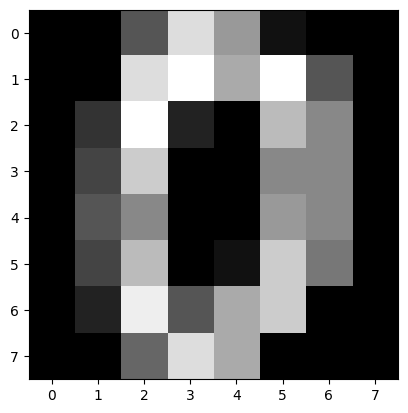

In [78]:
plt.imshow(digits.images[0], cmap='gray')

In [79]:
X_train_digits, X_test_digits, y_train_digits, y_test_digits = train_test_split(X_digits, y_digits, test_size=0.33, random_state=42)

In [76]:
#digits.images[0].flatten()

**Usando KNN**

In [81]:
neighbors_knn = KNeighborsClassifier(n_neighbors=10) #n_neighbors são 10 pois são 10 digitos: de 0 a 9
neighbors_knn.fit(X_train_digits, y_train_digits)
neighbors_pred_knn = neighbors_knn.predict(X_test_digits)
print(accuracy_score(neighbors_pred_knn, y_test_digits))

0.9831649831649831


In [86]:
#plt.imshow(X_test_digits[0].reshape(8, 8), cmap='gray')

In [87]:
#neighbors_pred_knn

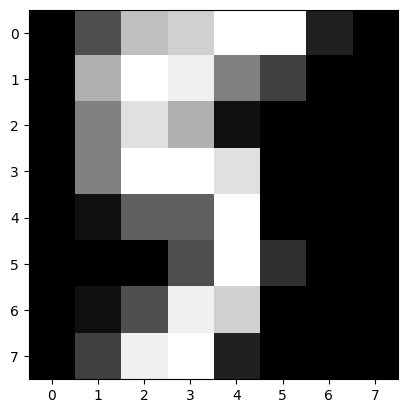

In [ ]:
#testar o modelo
plt.imshow(digits.images[15], cmap='gray') #peguei a decima quinta imagem do dataset que no caso é o numero 5

In [ ]:
digits.images[15]

array([[ 0.,  5., 12., 13., 16., 16.,  2.,  0.],
       [ 0., 11., 16., 15.,  8.,  4.,  0.,  0.],
       [ 0.,  8., 14., 11.,  1.,  0.,  0.,  0.],
       [ 0.,  8., 16., 16., 14.,  0.,  0.,  0.],
       [ 0.,  1.,  6.,  6., 16.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  5., 16.,  3.,  0.,  0.],
       [ 0.,  1.,  5., 15., 13.,  0.,  0.,  0.],
       [ 0.,  4., 15., 16.,  2.,  0.,  0.,  0.]])

In [88]:
#Vamos aferir se o modelo irá predizer corretamente
teste_digits = neighbors_knn.predict(np.array([digits.images[15].flatten()]))
teste_digits # Deu certo :)

array([5])

**Usando SVC**

In [ ]:
neighbors_svc = SVC()
neighbors_svc.fit(X_train, y_train)
neighbors_pred_svc = neighbors_svc.predict(X_test)
print(accuracy_score(neighbors_pred_svc, y_test))

0.9865319865319865
